## Задание 1

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('adventure-time.jpg')

In [3]:
img.shape

(1080, 1920, 3)

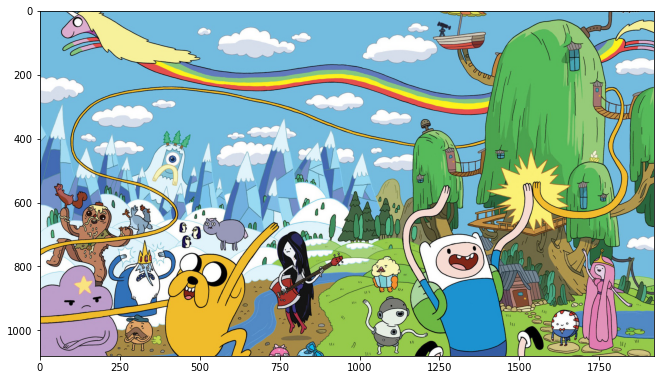

In [4]:
plt.figure(figsize=(11, 11))
plt.imshow(img)

### Инвертирование

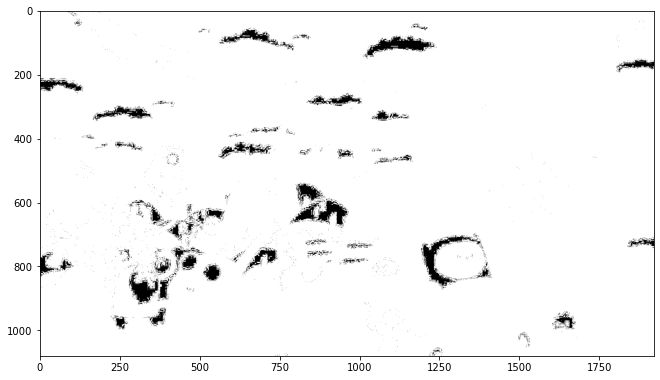

In [5]:
out_img = np.zeros(
    (img.shape[0],
     img.shape[1]), 
     dtype=np.float32)

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if img[y, x, 1] < 255:
            out_img[y, x] = 1
        else:
            out_img[y, x] = 0
            
plt.figure(figsize=(11, 11))
plt.imshow(out_img, cmap='gray')
plt.show()

### Размытие

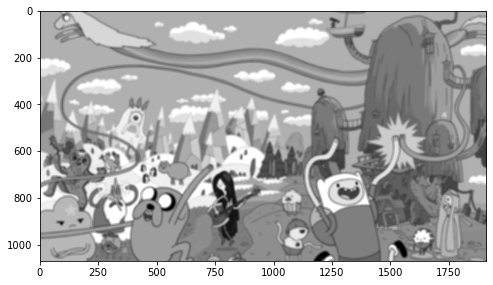

In [6]:
win_size = (11, 11)

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

def my_filter(x):
    # Box blur
    return np.mean(x)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j + win_size[1]]
        out_img[i,j] = my_filter(x)
        
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()

### Горизонтали

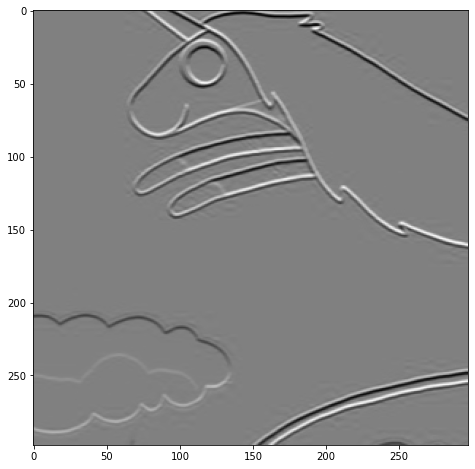

In [7]:
win_size = (3, 3)

core = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

img_copy = np.copy(img[:300, :300, 0])
img_copy = img_copy.astype(np.float32) / 255.

out_img = np.zeros(
    (img_copy.shape[0] - win_size[0] + 1,
     img_copy.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

def hor_filter(x):
    return np.sum(core * x)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_copy[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = hor_filter(x)
        
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()

### Вертикали

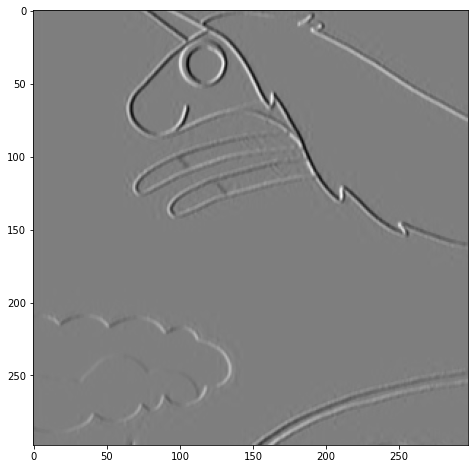

In [8]:
win_size = (3, 3)

core = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)

img_copy = np.copy(img[:300, :300, 0])
img_copy = img_copy.astype(np.float32) / 255.

out_img = np.zeros(
    (img_copy.shape[0] - win_size[0] + 1,
     img_copy.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

def ver_filter(x):
    return np.sum(core * x)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_copy[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = ver_filter(x)
        
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()

### OpenCV

In [9]:
import cv2

The type of this input is <class 'numpy.ndarray'>
Shape: (873, 1552, 3)


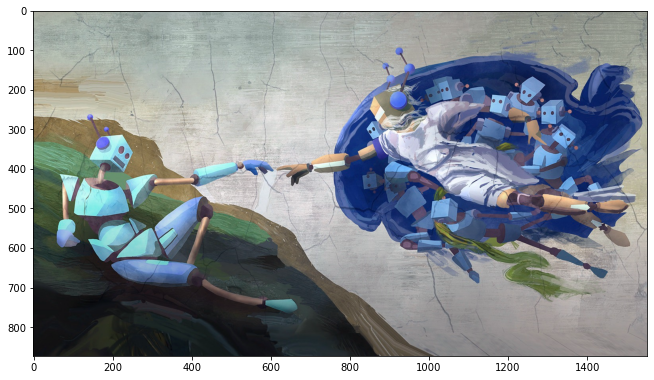

In [10]:
robot = cv2.imread('creacion-de-adan-robot.jpeg')
print('The type of this input is {}'.format(type(robot)))
print('Shape: {}'.format(robot.shape))
plt.figure(figsize=(11, 11))
plt.imshow(robot)

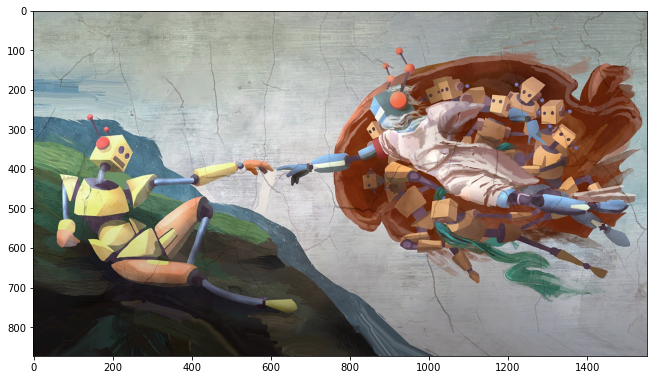

In [11]:
rgb_robot = cv2.cvtColor(robot, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(11, 11))
plt.imshow(rgb_robot)
plt.show()

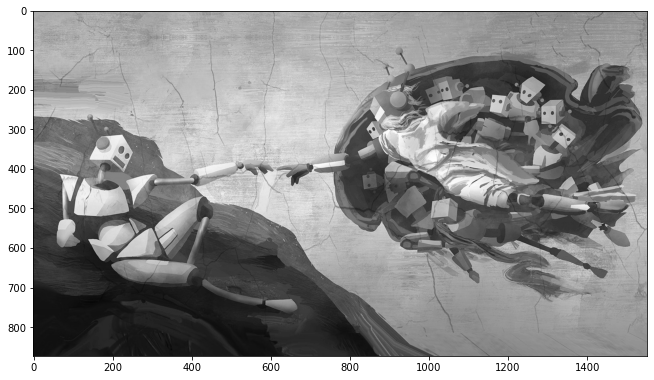

In [12]:
gray_robot = cv2.cvtColor(robot, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(11, 11))
plt.imshow(gray_robot, cmap='gray')
plt.show()

In [13]:
def view_image(image):
    plt.figure(figsize=(11, 11))
    plt.imshow(image)
    plt.show()

### Обрезка

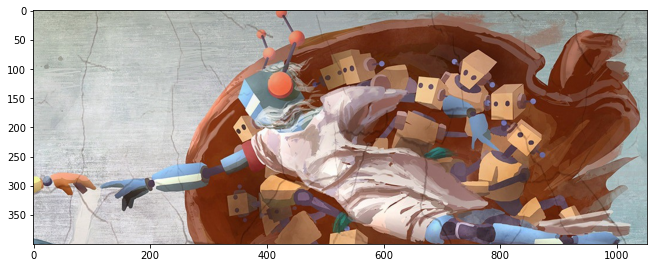

In [14]:
cropped_robot = rgb_robot[100:500, 500:2000]
view_image(cropped_robot)

### Изменение размера

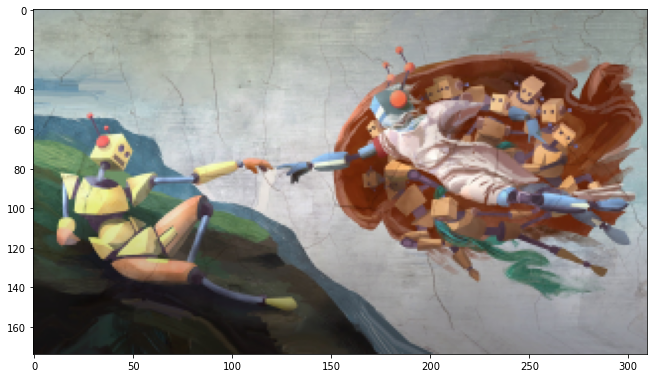

Shape original robot: (873, 1552, 3)
Shape resized_robot: (174, 310, 3)


In [15]:
scale_percent = 20 # percent of original size
width = int(rgb_robot.shape[1] * scale_percent / 100)
height = int(rgb_robot.shape[0] * scale_percent / 100)
dim = (width, height)
resized_robot = cv2.resize(rgb_robot, dim, interpolation = cv2.INTER_AREA)
view_image(resized_robot)
print('Shape original robot: {}'.format(rgb_robot.shape))
print('Shape resized_robot: {}'.format(resized_robot.shape))

### Вращение

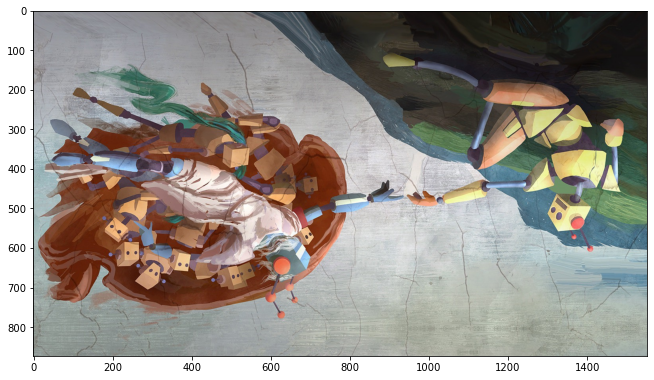

In [16]:
(h, w, d) = rgb_robot.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated_robot = cv2.warpAffine(rgb_robot, M, (w, h))
view_image(rotated_robot)

### Оттенки серого и пороговое значение (черно-белый эффект)

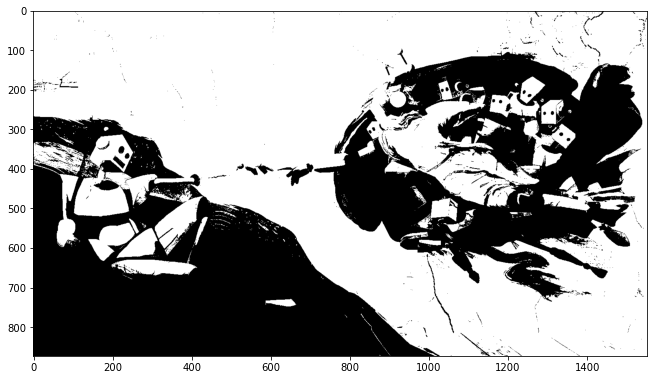

In [17]:
ret, threshold_robot = cv2.threshold(gray_robot, 127, 255, 0)
plt.figure(figsize=(11, 11))
plt.imshow(threshold_robot, cmap='gray')
plt.show()

### Размытие/Сглаживание

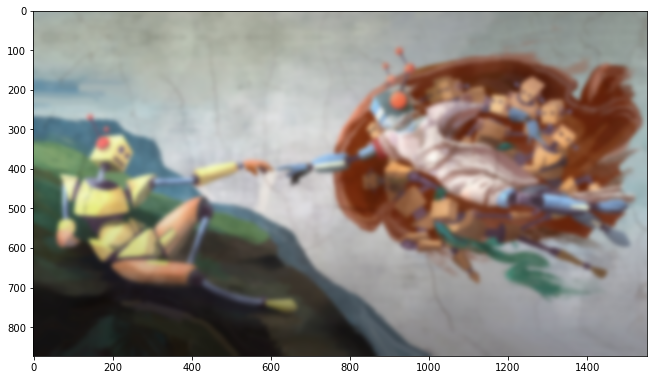

In [18]:
blurred_robot = cv2.GaussianBlur(rgb_robot, (35, 35), 0)
view_image(blurred_robot)

### Рисование прямоугольника / Bounding Box на изображении

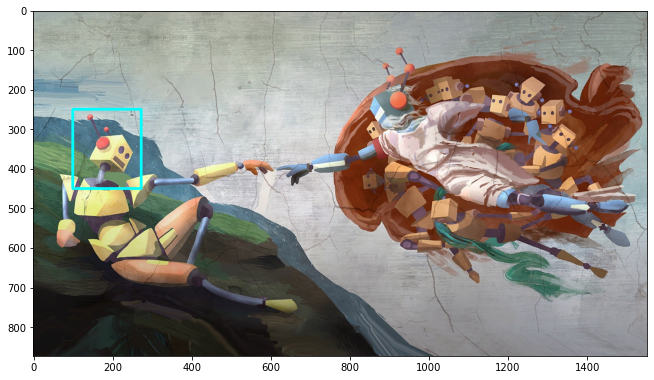

In [19]:
output_robot = rgb_robot.copy()
cv2.rectangle(output_robot, (273, 450), (100, 250), (0, 255, 255), 5)
view_image(output_robot) 

### Рисование линии

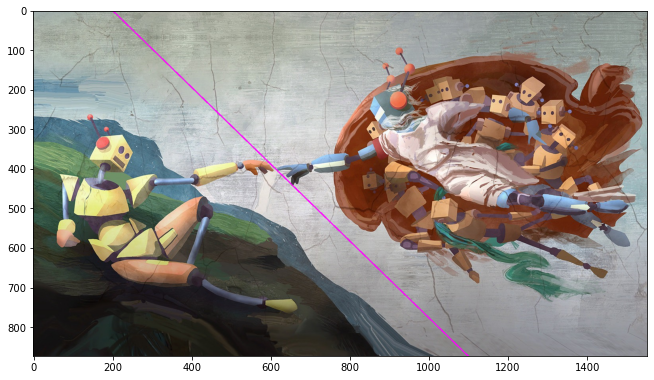

In [20]:
output_robot2 = rgb_robot.copy()
cv2.line(output_robot2, (200, 0), (1100, 873), (255, 0, 255), 2)
view_image(output_robot2)

### Текст на изображении

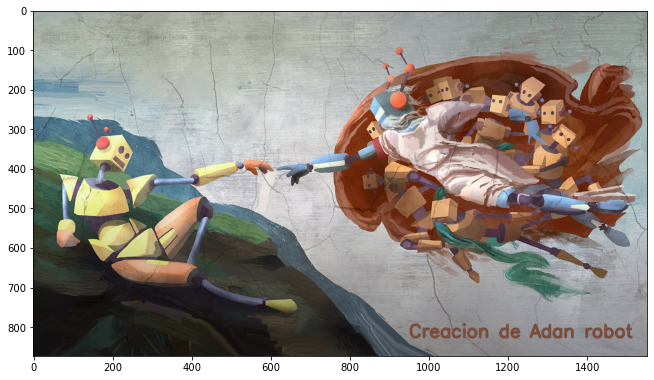

In [21]:
output_robot3 = rgb_robot.copy()
cv2.putText(output_robot3, 'Creacion de Adan robot', (950, 825),cv2.FONT_HERSHEY_SIMPLEX, 1.5, (121, 77, 57), 6) 
view_image(output_robot3)

### Преобразование RGB в Hex

In [22]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Получить цвета с изображения

In [23]:
from sklearn.cluster import KMeans
from collections import Counter

In [24]:
modified_image = cv2.resize(rgb_robot, (873, 1552), interpolation = cv2.INTER_AREA)
modified_image = rgb_robot.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [25]:
# Количество цветов, которое необходимо извлечь
clf = KMeans(n_clusters = 15)
labels = clf.fit_predict(modified_image)

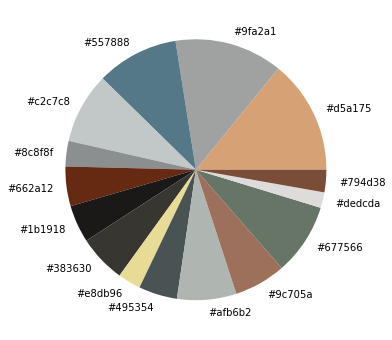

In [26]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (1):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)